<a href="https://colab.research.google.com/github/katti-jay/flutter/blob/master/Workflow_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import software libraries

In [ ]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.16.2
- Pandas 0.24.2
- Matplotlib 3.0.3
- SciPy 1.2.1
- Scikit-learn 0.20.3
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]



# Load the dataset

In [ ]:
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'housing_data')
print('Data files in this project:', os.listdir(DATA_PATH) )

# Read the raw dataset
data_raw_file = os.path.join( DATA_PATH, 'kc_house_data.csv' )
data_raw = pd.read_csv( data_raw_file )
print('Loaded {} records from {}.\n'.format(len(data_raw), data_raw_file))

Data files in this project: ['kc_house_data.csv']
Loaded 21613 records from ./housing_data/kc_house_data.csv.



# Get acquainted with the dataset

In [ ]:
print(data_raw.info())     # View features and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


# Show example records

In [ ]:
# View first ten records
print(data_raw.head(10))

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

# Examine descriptive statistics

In [4]:
with pd.option_context('float_format', '{:.2f}'.format):
    print( data_raw.describe())

NameError: ignored

# Summarize the most common values

In [ ]:
# Summarize most common values for features with non-continuous or categorical values
features_to_summarize = ['view','waterfront','grade','zipcode','bedrooms','bathrooms','floors']
data_raw[features_to_summarize].mode()

NameError: name 'data_raw' is not defined

# Show correlations with price

In [ ]:
# Look for correlations with price
print('Pearson correlations with price')
corr_matrix = data_raw.corr()
corr_matrix['price'].sort_values(ascending=False)

Pearson correlations with price


NameError: name 'data_raw' is not defined

# Analyze cross correlations

NameError: name 'sb' is not defined

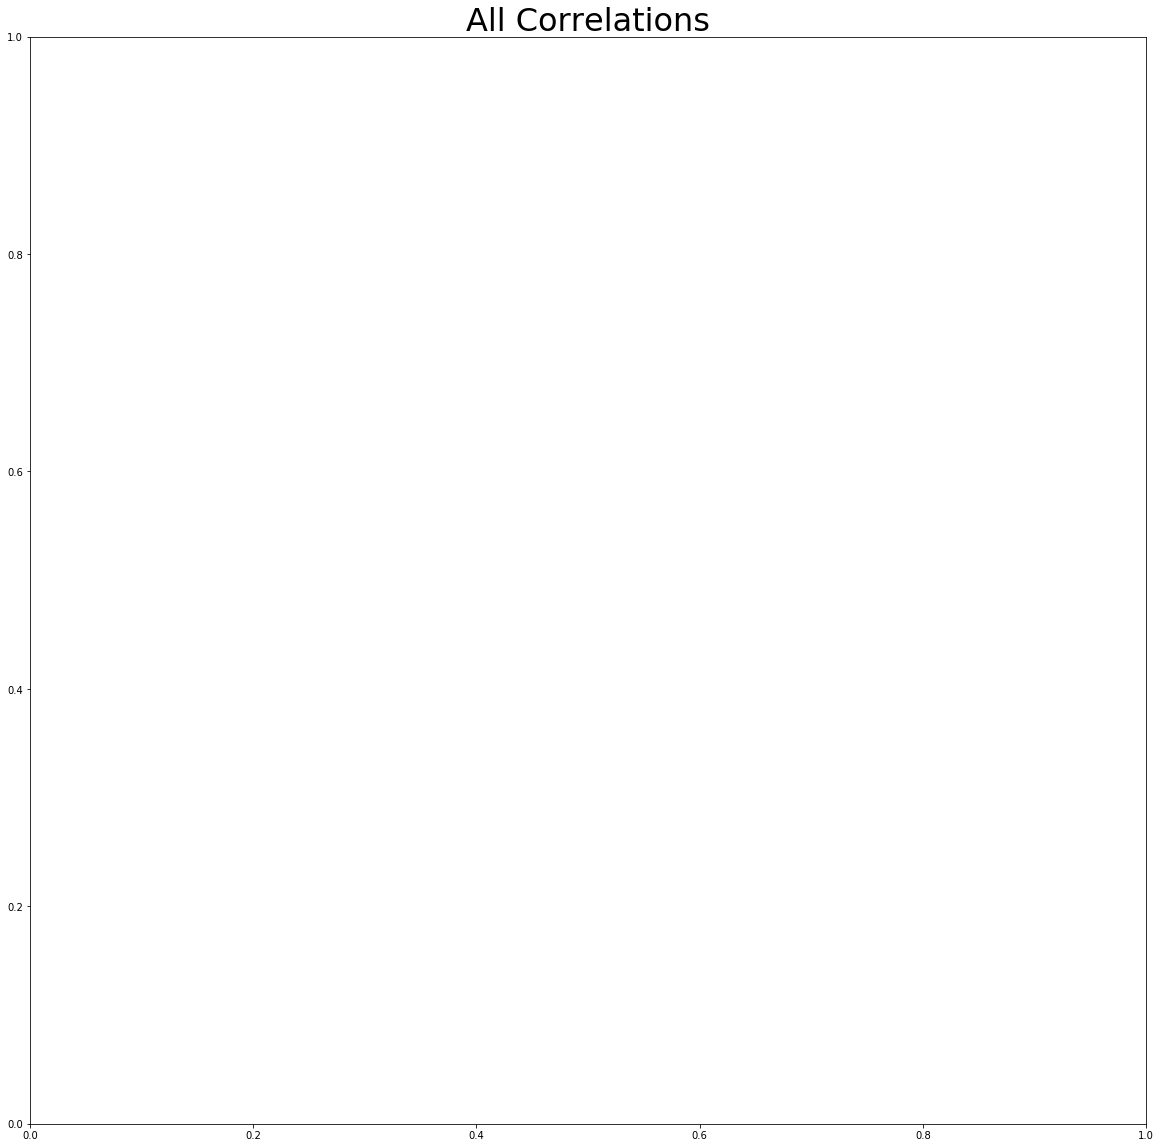

In [ ]:
# Use Matplotlib for visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Specify size and title for the visualization
f, axes = plt.subplots(figsize=(20, 20))
plt.title('All Correlations',fontsize=32)

# For the purpose of visualization, we'll use a different order for the features.
# We'll start with price, to make it easier to compare all other features with it.
features = ['price','bedrooms','bathrooms',
            'sqft_living','sqft_living15','sqft_lot','sqft_lot15','sqft_above','sqft_basement',
            'floors','waterfront',
            'view','condition','grade',
            'yr_built','yr_renovated',
            'zipcode','lat','long']

# Use Seaborn library to plot the correlation matrix as a heatmap
sb.heatmap(data_raw[features].corr(),
           linewidths = 3.0,
           square = True,
           cmap = 'Greens',
           linecolor='w',
           annot=True,
           annot_kws={'size':11},
           cbar_kws={'shrink': .5});


# Use histograms to visualize the distribution of various features

In [ ]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

# Visualize with a geographic map to gain insights regarding location

In [ ]:
# To avoid overwhelming the visualization tool, we'll only plot every Nth house.
n_homes = 20
data_raw_subset = data_raw.sort_values(by =['price'], ascending = False)[::n_homes]

# Output highest house price
max_price = data_raw_subset.loc[data_raw_subset['price'].idxmax()]['price']
print(f'The highest home price in this dataset is ${max_price:,.0f}')

# Descriptions of the building grades used in King County
# Values obtained from http://www5.kingcounty.gov/sdc/FGDCDocs/resbldg_extr_faq.htm
bldg_grades = ['Unknown','Cabin','Substandard','Poor','Low','Fair',
               'Low Average','Average','Good','Better',
               'Very Good','Excellent','Luxury','Mansion','Exceptional Properties']

# Use Folium library to plot values on a map.
import folium

# Generate the base map, centering on King County.
base_map = folium.Map(location = [47.5300, -122.2000],
                      control_scale = True,
                      max_zoom = 20,
                      zoom_start = 10,
                      zoom_control = True)

# Plot homes by price.
for index, row in data_raw_subset.iterrows():

    # Get the grade description for this row.
    grade_desc = bldg_grades[row['grade']]
    waterfront_desc = "Yes" if (row['waterfront'] == 1) else "No"

    # Add popup text. Click each point to show details.
    popup_text = '<br>'.join(['King&nbsp;County&nbsp;Housing&nbsp;Sales&nbsp;Data',
                              'Price:&nbsp;${:,.0f}',
                              'Sqft&nbsp;Living:&nbsp;{:,.0f}',
                              'Grade:&nbsp;{}&nbsp;({})',
                              'Location:&nbsp;[{:.3f},{:.3f}]',
                              'Waterfront:&nbsp;{}',
                              'Zipcode:&nbsp;{}'])

    popup_text = popup_text.format(row['price'],
                                   row['sqft_living'],
                                   row['grade'], grade_desc,
                                   row['lat'], row['long'],
                                   waterfront_desc,
                                   row['zipcode'])

    # Add each home to the map, but show larger dots for higher prices.
    scaling_value = (row['price'] / max_price)      # 1.0 for highest price.
    folium.CircleMarker([row['lat'], row['long']],
                        radius = 25 * scaling_value,
                        weight = 1,
                        fill = True,
                        fillColor = '#0000FF',
                        fillOpacity = 0.7,
                        color = '#0000FF',
                        opacity = 0.7,
                        popup = popup_text).add_to(base_map)

base_map

# Split the data into training and testing sets and labels

In [ ]:
from sklearn.model_selection import train_test_split

# Price is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate dataframe for labels.

label_columns = ['price']

training_columns = ['sqft_living',
                   'grade',
                   'bathrooms',
                   'view',
                   'sqft_basement',
                   'bedrooms',
                   'lat',
                   'waterfront',
                   'floors',
                   'yr_renovated',
                   'sqft_lot',
                   'yr_built',
                   'condition',
                   'long',
                   'zipcode']

# Split independent and dependent variables.
data_train,data_test,data_train_labels,data_test_labels = train_test_split(data_raw[training_columns],
                                                                           data_raw[label_columns],
                                                                           random_state = 42)

# Compare the number of rows and columns in the original data to the training and testing sets
print(f'Original Set:      {data_raw.shape}')
print('------------------------------')
print(f'Training Features: {data_train.shape}')
print(f'Testing Features:  {data_test.shape}')
print(f'Training Labels:   {data_train_labels.shape}')
print(f'Testing Labels:    {data_test_labels.shape}')

# Build and test a linear regression model - Round 1

In [ ]:
from sklearn.linear_model import LinearRegression
from time import time

# Create a linear regression model
regressor = LinearRegression()

# Fit the model using training data and labels
start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

# Use the holdout dataset to test the model

In [ ]:
# Evaluate the model's performance using test data and labels
score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

# Compare predicted values to actual values

In [ ]:
predicted_prices = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted'] = predicted_prices

# View examples comparing actual prices to predicted prices
with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

In [ ]:
def compare_pred_to_actual(chart_description):

    N = 10 # Plot every Nth value to save time and space
    pred_df = predictions.sort_values('price')[::N]

    pred_df['diff'] = pred_df['price'] - pred_df['predicted']
    pred_df['recnum'] = np.arange(len(pred_df))
    pred_df['error_pct'] = abs(pred_df['diff']/pred_df['price'])*100

    ax = plt.figure(figsize=[18,10])
    plt.ylabel('Price')
    plt.xlabel('House')
    plt.plot(pred_df['recnum'], pred_df['price'], color='blue');
    plt.scatter(pred_df['recnum'],
                pred_df['predicted'],
                pred_df['error_pct'],
                color='red');

    ax.legend(['Actual','Predicted'],
              loc='lower center',
              ncol=2,
              title=chart_description)

    plt.show()

# Compare the predicted prices to actual prices
compare_pred_to_actual('House prices predicted using linear regression')

# Identify outliers

In [ ]:
feature_list = ['price','bedrooms']

for feature in feature_list:
    plt.figure(figsize=(20,2))
    bplot = sb.boxplot(x=feature, data=data_raw, orient="h", fliersize=7)

# Examine data values in the outliers

In [ ]:
# Houses with a value above $6,000,000
data_train.loc[data_train_labels['price'] > 6000000]

In [ ]:
# Houses with more than 11 bedrooms
data_train.loc[data_train['bedrooms'] > 11]

# Drop outliers from the training dataset

In [ ]:
print(f'{len(data_train):6d} houses in the training dataset')

# Keep only the rows for houses priced $6M or less
data_train = data_train.loc[data_train_labels['price'] <= 6000000]
data_train_labels = data_train_labels.loc[data_train_labels['price'] <= 6000000]
print(f'{len(data_train):6d} houses remain after dropping those priced over $6M')

# Keep only the rows for houses with 11 or fewer bedrooms
data_train_labels = data_train_labels.loc[data_train['bedrooms'] <= 11]
data_train = data_train.loc[data_train['bedrooms'] <= 11]
print(f'{len(data_train):6d} houses remain after dropping those with more than 11 bedrooms')

# Show statistics for the training features

In [ ]:
# Show statistics for the features we'll be using, to prepare for feature scaling.
with pd.option_context('float_format', '{:.2f}'.format):
    print(data_train['sqft_living'].describe(), '\n')
    print(data_train_labels['price'].describe())

# Compare the scale and distribution of price and sqft_living

In [ ]:
# Compare scale and distribution of price and sqft_living
def compare_price_sqft():

    print('Maximum price =', data_train_labels.loc[data_train_labels['price'].idxmax()]['price']);
    print('Maximum sqft_living =', data_train.loc[data_train['sqft_living'].idxmax()]['sqft_living']);

    fig = plt.figure(figsize=(15,3))
    fig.subplots_adjust(wspace=.4)

    plt.rc('axes', titlesize=9)     # fontsize of the axes title
    plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=8)    # fontsize of the tick labels

    ax1=fig.add_subplot(1, 3, 1)
    plt.xlabel('price')
    plt.hist(data_train_labels['price'], label='price');

    ax2=fig.add_subplot(1, 3, 2)
    plt.xlabel('sqft_living')
    plt.hist(data_train['sqft_living'], label='sqft_living');

    # View relationship between price and sqft_living
    ax2=fig.add_subplot(1, 3, 3)
    sb.scatterplot(x=data_train_labels['price'], y=data_train['sqft_living']);

compare_price_sqft()

# Transform price and sqft_living, and compare results

In [ ]:
# Apply a log transformation to scale price and sqft_living
data_train['sqft_living'] = np.log(data_train['sqft_living'])
data_train_labels['price'] = np.log(data_train_labels['price'])

# Log transformation must be applied to test dataset as well
data_test['sqft_living'] = np.log(data_test['sqft_living'])
data_test_labels['price'] = np.log(data_test_labels['price'])

# Compare scale and distribution of price and sqft_living
compare_price_sqft()

# Build and test a linear regression model - Round 2

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model and fit it using the training data
regressor = LinearRegression()

start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

# Evaluate the model's performance
score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

# Compare the first ten predictions to actual values

In [ ]:
# y_pred is the predicted prices that will be produced by testing
predicted_prices = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted'] = predicted_prices

# View examples of the transformed prices
with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

# Convert the prices back to actual values

In [ ]:
# Need to call exp() function to convert back from log value to actual price.
import math
predictions = predictions.applymap(math.exp)

# View examples of the actual and predicted prices
with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

# Compare predicted values to actual values (Round 2)

In [ ]:
# Compare the predicted prices to actual prices
compare_pred_to_actual('House prices predicted using linear regression (Round 2)')

# Try a different algorithm

In [ ]:
# Create a model using the random forest algorithm.
from sklearn.ensemble import RandomForestRegressor

rnd_forest = RandomForestRegressor(n_estimators=100,random_state=0)

start = time()
rnd_forest.fit(data_train, data_train_labels.values.ravel())
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

score = rnd_forest.score(data_test, data_test_labels)
print('Score: {}%'.format(int(round(score * 100))))

# View examples of the actual and predicted prices

In [ ]:
predicted_prices = rnd_forest.predict(data_test)

predictions = data_test_labels.copy()
predictions['predicted'] = predicted_prices

# Scale the prices back to actual values.
predictions = predictions.applymap(math.exp)

# View examples of the actual and predicted prices
with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

In [ ]:
# Compare the new predicted prices to actual prices
compare_pred_to_actual('House prices predicted using random forest')